In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cp /content/drive/MyDrive/faces.zip /content/sample_data

In [3]:
%cd /content/sample_data
%pwd
%ls

/content/sample_data
anscombe.json*               california_housing_train.csv  mnist_test.csv         README.md*
california_housing_test.csv  faces.zip                     mnist_train_small.csv


Question 1a

In [4]:
!unzip faces.zip

Archive:  faces.zip
   creating: faces/
  inflating: faces/test.txt          
  inflating: faces/train.txt         
   creating: faces/images/
 extracting: faces/images/person04_18.png  
 extracting: faces/images/person04_17.png  
 extracting: faces/images/person04_16.png  
 extracting: faces/images/person04_15.png  
 extracting: faces/images/person04_14.png  
 extracting: faces/images/person04_13.png  
 extracting: faces/images/person04_12.png  
 extracting: faces/images/person04_11.png  
 extracting: faces/images/person04_10.png  
 extracting: faces/images/person04_09.png  
 extracting: faces/images/person04_08.png  
 extracting: faces/images/person04_07.png  
 extracting: faces/images/person04_06.png  
 extracting: faces/images/person04_05.png  
 extracting: faces/images/person04_04.png  
 extracting: faces/images/person04_03.png  
 extracting: faces/images/person04_02.png  
 extracting: faces/images/person04_01.png  
 extracting: faces/images/person03_64.png  
 extracting: faces/im

Question 1b

<ipython-input-5-9fe540d77d28>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])


(540, 2500)
(540,)


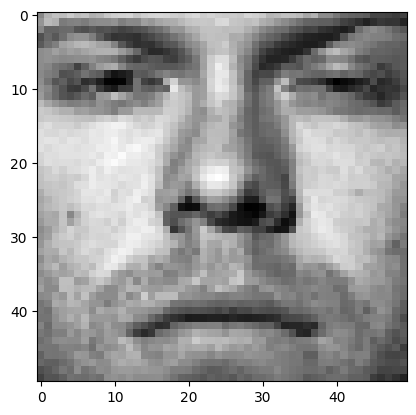

In [5]:
# load training dataset

import numpy as np
import imageio
# from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    # im = misc.imread(line.strip().split()[0])
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])

train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape)
print(train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

<ipython-input-6-3bf99249105d>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])


(100, 2500)
(100,)


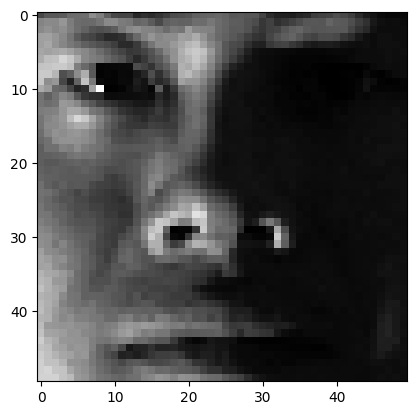

In [6]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    # im = misc.imread(line.strip().split()[0])
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])

test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape)
print(test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

Question 1c

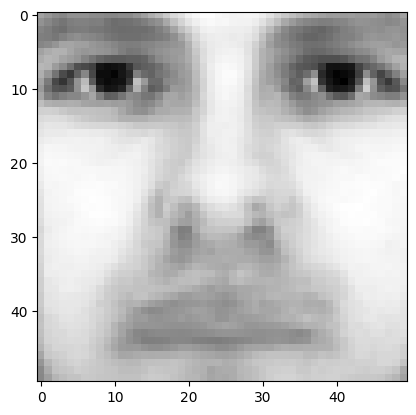

In [7]:
avg_face = np.sum(train_data, axis = 0) / train_data.shape[0]
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

Question 1d

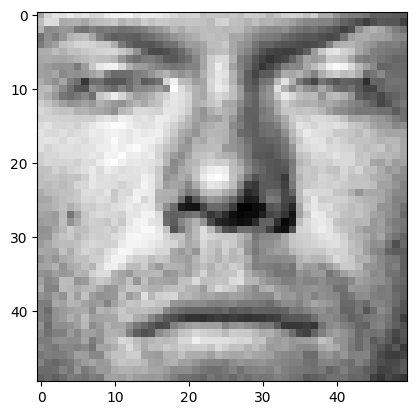

In [8]:
train_data_demeaned =train_data
# print(train_data_demeaned.shape)

for i in range(train_data.shape[0]):
  train_data_demeaned [i,:]= np.subtract(train_data [i,:], avg_face)

plt.imshow(train_data_demeaned[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500)


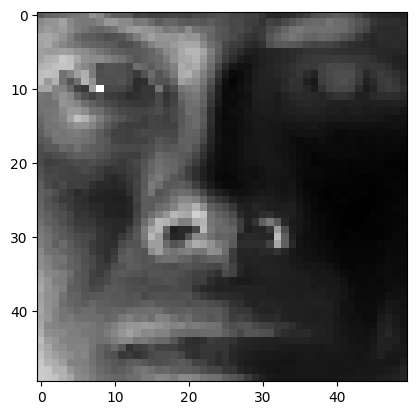

In [9]:
test_data_demeaned =test_data
print(test_data_demeaned.shape)
for i in range(test_data.shape[0]):
  test_data_demeaned [i,:]= np.subtract(test_data [i,:], avg_face)

plt.imshow(test_data_demeaned[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

Question 1e
Try to find eigenfaces

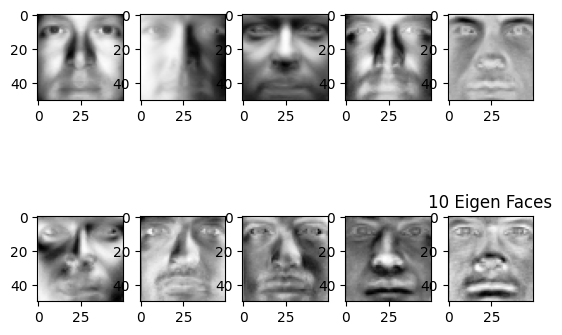

In [10]:
U, Sigma, Vt = np.linalg.svd(train_data_demeaned)
plt.figure()
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Vt[i, :].reshape(50, 50), cmap = cm.Greys_r)
plt.title('10 Eigen Faces')
plt.show()

Question 1f - Eigenface Feature

In [11]:
r=10
# Vt = eigenfaces_sorted
F_feature_matrix_train = train_data_demeaned.dot(np.transpose(Vt[:r,:]))

In [12]:
print(F_feature_matrix_train.shape)

(540, 10)


In [13]:
F_feature_matrix_test = test_data_demeaned.dot(np.transpose(Vt[:r,:]))

In [14]:
print(F_feature_matrix_test.shape)

(100, 10)


Question 1g - Face Recognition

In [15]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=500)
logistic_regression_model.fit(F_feature_matrix_train, train_labels)

test_acc = logistic_regression_model.score(F_feature_matrix_test, test_labels)
print('Testing Accuracy : '+str(test_acc*100)+' %')

Testing Accuracy : 79.0 %


In [16]:
def get_accuracy(y_test_pred, test_labels):
  count = 0
  for i in range(len(y_test_pred)):
    if y_test_pred[i] == test_labels[i]:
      count +=1
  return (count / len(test_labels))*100

In [17]:
y_test_pred = logistic_regression_model.predict(F_feature_matrix_test)
print(y_test_pred)
print(get_accuracy(y_test_pred, test_labels))

[ 7  1  5  3  1  1  1  1  1  4  3  2  2  2  2  2  2  2  2  3  2  2  3  3
  3  3  3  3  3  3  7  1  4  4  7  4  4  4  4  4  5  5  5  6  5  5  5  5
  5  5  6  6  6  1  6  6  6  6  6  6  7  7  3  7  7  6  9  7  7  5  8  8
  8  8  8  8  4  8  8  8  8  9  9  9  9  9  9  9  9  9  4 10 10 10  1 10
 10 10 10 10]
79.0


In [18]:
accuracy = np.zeros(200)
for r in range(1,201):
    print("calculating iteration {}".format(r))
    F_feature_matrix_test = test_data_demeaned.dot(np.transpose(Vt[:r,:]))
    F_feature_matrix_train = train_data_demeaned.dot(np.transpose(Vt[:r, :]))
    logistic_regression_model.fit(F_feature_matrix_train, train_labels)
    accuracy[r-1] = logistic_regression_model.score(F_feature_matrix_test, test_labels)*100

calculating iteration 1
calculating iteration 2
calculating iteration 3
calculating iteration 4
calculating iteration 5
calculating iteration 6
calculating iteration 7
calculating iteration 8
calculating iteration 9
calculating iteration 10
calculating iteration 11
calculating iteration 12
calculating iteration 13
calculating iteration 14
calculating iteration 15
calculating iteration 16
calculating iteration 17
calculating iteration 18
calculating iteration 19
calculating iteration 20
calculating iteration 21
calculating iteration 22
calculating iteration 23
calculating iteration 24
calculating iteration 25
calculating iteration 26
calculating iteration 27
calculating iteration 28
calculating iteration 29
calculating iteration 30
calculating iteration 31
calculating iteration 32
calculating iteration 33
calculating iteration 34
calculating iteration 35
calculating iteration 36
calculating iteration 37
calculating iteration 38
calculating iteration 39
calculating iteration 40
calculati

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


calculating iteration 58
calculating iteration 59
calculating iteration 60
calculating iteration 61
calculating iteration 62
calculating iteration 63
calculating iteration 64
calculating iteration 65
calculating iteration 66
calculating iteration 67
calculating iteration 68
calculating iteration 69
calculating iteration 70
calculating iteration 71
calculating iteration 72
calculating iteration 73
calculating iteration 74
calculating iteration 75
calculating iteration 76
calculating iteration 77
calculating iteration 78
calculating iteration 79
calculating iteration 80
calculating iteration 81
calculating iteration 82
calculating iteration 83
calculating iteration 84
calculating iteration 85
calculating iteration 86
calculating iteration 87
calculating iteration 88
calculating iteration 89
calculating iteration 90
calculating iteration 91
calculating iteration 92
calculating iteration 93
calculating iteration 94
calculating iteration 95
calculating iteration 96
calculating iteration 97


In [19]:
for i in range (len(accuracy)):
  print(accuracy[i])

14.000000000000002
12.0
12.0
18.0
42.0
35.0
50.0
64.0
72.0
79.0
81.0
82.0
85.0
85.0
87.0
89.0
87.0
84.0
85.0
87.0
89.0
86.0
89.0
89.0
90.0
90.0
90.0
90.0
91.0
92.0
92.0
93.0
91.0
90.0
91.0
92.0
95.0
92.0
94.0
96.0
93.0
96.0
97.0
95.0
93.0
93.0
96.0
92.0
92.0
94.0
93.0
93.0
94.0
93.0
93.0
93.0
93.0
92.0
92.0
86.0
89.0
89.0
91.0
92.0
91.0
92.0
93.0
94.0
92.0
92.0
89.0
90.0
90.0
90.0
86.0
87.0
86.0
86.0
86.0
85.0
85.0
85.0
86.0
91.0
91.0
92.0
91.0
91.0
92.0
91.0
90.0
92.0
93.0
92.0
92.0
93.0
93.0
93.0
93.0
93.0
96.0
93.0
93.0
95.0
94.0
94.0
94.0
94.0
92.0
91.0
92.0
93.0
93.0
95.0
94.0
94.0
94.0
95.0
95.0
95.0
95.0
95.0
95.0
94.0
94.0
94.0
96.0
94.0
96.0
97.0
97.0
97.0
97.0
97.0
97.0
95.0
95.0
95.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
96.0
95.0
96.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
97.0
9

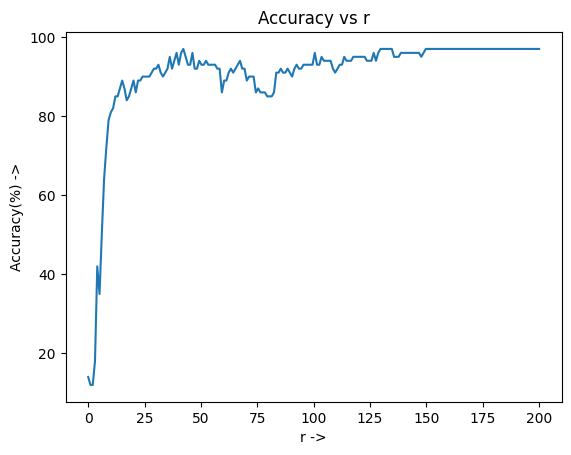

In [20]:
from matplotlib import pyplot as plt1
plt1.figure()
plt1.title('Accuracy vs r')
plt1.xlabel('r ->')
plt1.ylabel('Accuracy(%) ->')
plt1.plot(np.linspace(0,200,200),accuracy)
plt1.show()

Question 1h - Low Rank Data Loss

In [21]:
reconstructed_error = np.zeros(200)
for r in range(1,201):
    # F_feature_matrix_test = test_data_demeaned.dot(np.transpose(Vt[:r,:]))
    F_feature_matrix_train = train_data_demeaned.dot(np.transpose(Vt[:r, :]))
    train_data_reconstructed = F_feature_matrix_train.dot(Vt[:r, :])
    # print(training_matrix_reconstructed.shape)
    reconstructed_error[r-1] = np.linalg.norm(train_data_demeaned - train_data_reconstructed)

In [22]:
for i in range (len(reconstructed_error)):
  print(reconstructed_error[i])

54390.95865231905
36015.79307469679
32258.595071039406
30299.483165550384
29035.66577770302
27918.277395498862
26937.641766941153
25987.164425224884
25134.048476028256
24483.797648430023
23874.967974280673
23311.099866900717
22764.479489885784
22263.634281596285
21818.538181352007
21415.503235946984
21020.67463412161
20640.18771124539
20281.485599326774
19935.560515909638
19587.66870497639
19252.826018357355
18954.51357555826
18661.68037851338
18378.365963963322
18097.043180249897
17830.05002532812
17565.984167936083
17311.044091479205
17071.10872603234
16845.077313963313
16620.650819777693
16413.187459385572
16215.350020740423
16017.310509122055
15820.06909705064
15642.636934298122
15466.838801527216
15293.972534224022
15120.71264599545
14957.41247795829
14796.221363824712
14643.277073435787
14491.959178668147
14341.585162586056
14192.54683109995
14049.330698886457
13908.054489699534
13771.103526844463
13637.63590412416
13505.171349600374
13375.941602876466
13247.822483812666
13120.98

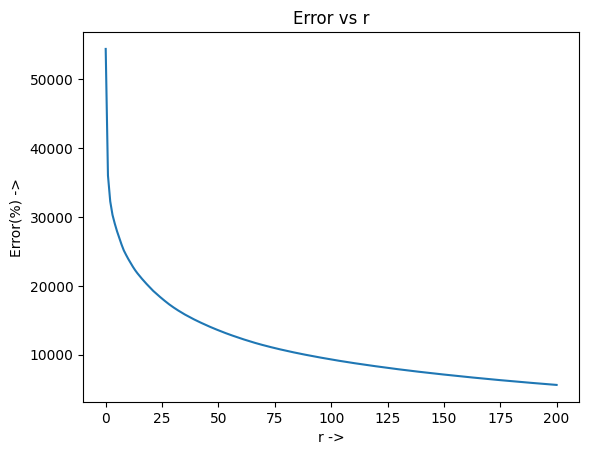

In [23]:
from matplotlib import pyplot as plt1
plt1.figure()
plt1.title('Error vs r')
plt1.xlabel('r ->')
plt1.ylabel('Error(%) ->')
plt1.plot(np.linspace(0,200,200),reconstructed_error)
plt1.show()

Question 2 - EM on the Old Faithful Geyser dataset

In [24]:
# load the data - how do we want to format / load the data - pandas dataframe, or array ?

In [25]:
%cp /content/drive/MyDrive/old_faithful_geyser.csv /content/sample_data

In [26]:
import pandas as pd
df = pd.read_csv('old_faithful_geyser.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   eruptions   272 non-null    float64
 2   waiting     272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB


In [27]:
df.drop(df.columns[0], axis=1, inplace=True)

In [28]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Question 2a

Plot all the data points on a 2D plane

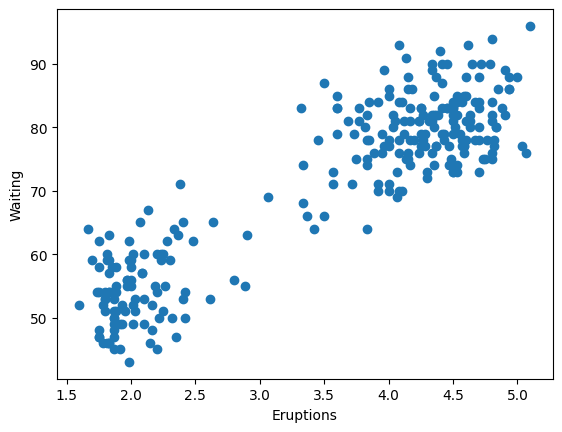

In [29]:
import matplotlib.pyplot as plt
plt.scatter(df["eruptions"], df["waiting"])
plt.xlabel("Eruptions")
plt.ylabel("Waiting")
plt.show()

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as gauss
from sklearn.metrics.pairwise import euclidean_distances as l2

In [31]:
def em_gaussian_mixture(X, K, mu_pred, eps=1e-3, max_iter=100):
    N, D = X.shape
    mu_pred_history = []  # To store mu_pred for each iteration

    # Initialize parameters for EM
    pi_pred = np.ones(shape=(K), dtype=np.float)/K
    sigma_pred = np.zeros(shape=(K, D, D), dtype=np.float)
    for d in range(D):
        sigma_pred[:, d, d] = np.var(X[:, d])/10

    for _ in range(max_iter):
        print("iteration: {}".format(_))
        # E-step
        gamma = np.zeros(shape=(N, K))
        for k in range(K):
            # print("gamma: {}".format(gamma[:k]))
            # print("mu_pred[k]: {}".format(mu_pred[k]))
            # print("sigma_pred[k]: {}".format(sigma_pred[k]))
            # print("pi_pred[k]: {}".format(pi_pred[k]))
            gamma[:, k] = gauss.pdf(X, mean=mu_pred[k], cov=sigma_pred[k]) * pi_pred[k]
        gamma = gamma/np.sum(gamma, axis=1, keepdims=True)

        # Calculate the objective

        obj = 0
        for k in range(K):
            pdf_values = gauss.pdf(X, mean=mu_pred[k], cov=sigma_pred[k])

            # Avoid taking the log of zero or negative values
            pdf_values = np.maximum(pdf_values, 1e-10)  # Small positive value to prevent "nan"
            pi_k = np.maximum(pi_pred[k], 1e-10)  # Small positive value to prevent "nan"

            obj += np.sum(gamma[:, k] * (np.log(pdf_values) + np.log(pi_k)))
            # print("k: {}, obj: {}".format(k, obj))

        # obj = 0
        # for k in range(K):
        #     obj += np.sum(gamma[:, k] * (np.log(gauss.pdf(X, mean=mu_pred[k], cov=sigma_pred[k])) + np.log(pi_pred[k])))
        #     print("k: {}, obj: {}".format(k, obj))

        # Append mu_pred to the history list
        mu_pred_history.append(mu_pred.copy())

        # Calculate cluster labels
        labels = np.argmax(gamma, axis=1)

        if _ > 1:
        # Check for convergence
            if np.abs(obj - prev_obj) < eps:
                print("converged")
                break

        # M-step
        prev_obj = obj

        pi_pred = np.sum(gamma, axis=0)/np.sum(gamma)
        for k in range(K):
            mu_pred[k, :] = np.sum(gamma[:, k].reshape(-1,1) * X, axis=0) / np.sum(gamma[:, k], keepdims=True)
            sigma_pred[k, :, :] = np.sum(gamma[:, k].reshape(-1, 1, 1) * ((X-mu_pred[k, :]).reshape(N, D, 1) @ (X-mu_pred[k, :]).reshape(N, 1, D)), axis=0) / np.sum(gamma[:, k])

    return obj, labels, pi_pred, mu_pred, sigma_pred, mu_pred_history

In [40]:
print(centroids[0])
print(centroids[1])

[ 4.29793023 80.28488372]
[ 2.09433 54.75   ]


iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
converged
[3.0, 3.4853293217493118, 3.479689630979459, 3.4692951052708616, 3.4598490574490977, 3.4534286785592494, 3.446056125383118, 3.43965775955476, 3.4351815706714084, 3.4314821746922344, 3.428121827587127, 3.4250838915374824, 3.4223645626462633, 3.419803863217423, 3.4170634115173457, 3.4135884560619463, 3.4084834005564537, 3.4005584736498484, 3.38890329613041

<ipython-input-31-b19710023672>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pi_pred = np.ones(shape=(K), dtype=np.float)/K
<ipython-input-31-b19710023672>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigma_pred = np.zeros(shape=(K, D, D), dtype=np.float)


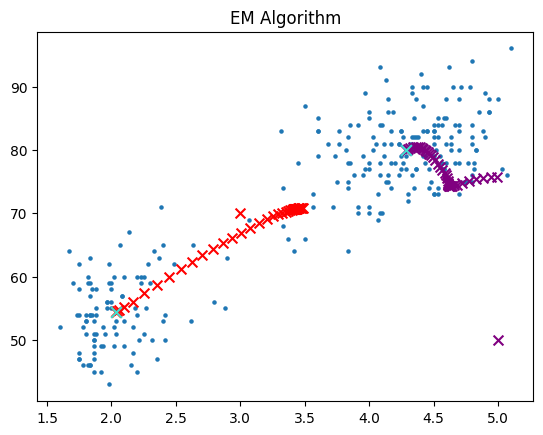

In [41]:
X = df.to_numpy()[:,:2]
K = 2
mu_pred = np.array([[3.0, 70],[5.0, 50]], dtype=float)
obj, _, pi_pred, mu_pred, sigma_pred, mu_pred_history = em_gaussian_mixture(X, K, mu_pred)

centroid_1_x = [centroids_set[0][0] for centroids_set in mu_pred_history]
centroid_1_y = [centroids_set[0][1] for centroids_set in mu_pred_history]
centroid_2_x = [centroids_set[1][0] for centroids_set in mu_pred_history]
centroid_2_y = [centroids_set[1][1] for centroids_set in mu_pred_history]
print(centroid_1_x)
print(centroid_1_y)
print(centroid_2_x)
print(centroid_2_y)

# Plot the data points and cluster centroids for visualization
plt.scatter(data[:, 0], data[:, 1], marker='o', s=5)
plt.scatter(centroid_1_x, centroid_1_y, marker='x', color='red', s=50)
plt.scatter(centroid_2_x, centroid_2_y, marker='x', color='purple', s=50)
plt.scatter(centroid_1_x[-1], centroid_1_y[-1], marker='x', color='turquoise', s=60)
plt.scatter(centroid_2_x[-1], centroid_2_y[-1], marker='x', color='turquoise', s=60)
# plt.legend()
plt.title('EM Algorithm')
plt.show()

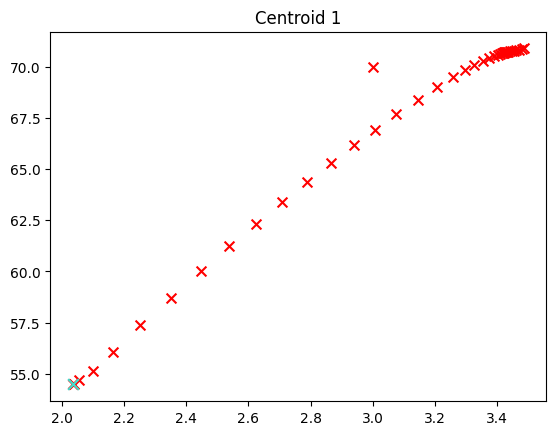

In [42]:
plt.scatter(centroid_1_x, centroid_1_y, marker='x', color='red', s=50)
plt.scatter(centroid_1_x[-1], centroid_1_y[-1], marker='x', color='turquoise', s=60)
plt.title('Centroid 1')
plt.show()

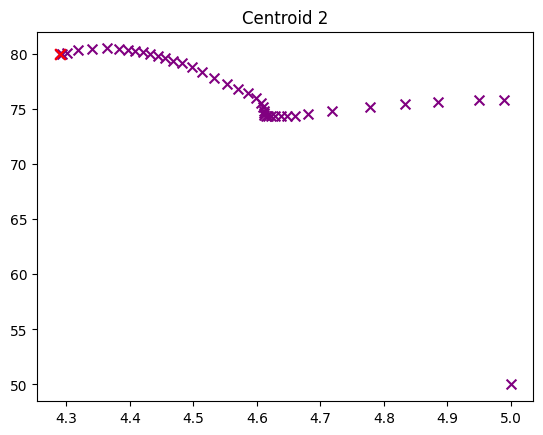

In [43]:
plt.scatter(centroid_2_x, centroid_2_y, marker='x', color='purple', s=50)
plt.scatter(centroid_2_x[-1], centroid_2_y[-1], marker='x', color='red', s=60)
plt.title('Centroid 2')
plt.show()

In [44]:
print("centroid 1: {}, {}  centroid 2: {}, {}".format(centroid_1_x[-1], centroid_1_y[-1],centroid_2_x[-1], centroid_2_y[-1]))

centroid 1: 2.036390889074844, 54.478540865080596  centroid 2: 4.28966412723854, 79.96814122774104


Question 2e

run K-means with K=2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


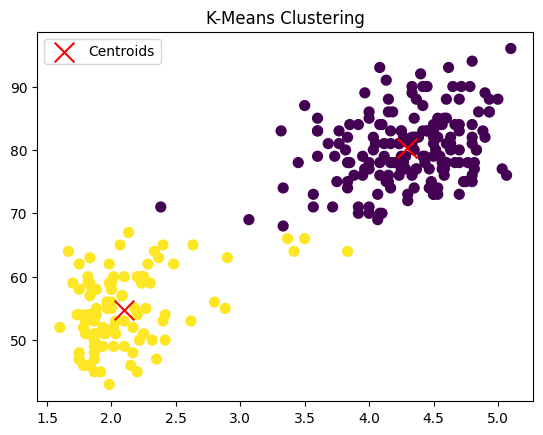

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs  # You can replace this with your dataset loading method

# Create or load your dataset (replace this with your dataset)
# n_samples = 272
# n_features = 2
# data, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=42)

# Specify the number of clusters (K) you want to find
n_clusters = 2

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(data)

# Get cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the data points and cluster centroids for visualization
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.show()


Question 3

Question 3a - plot density estimate as function of x using bandwitdth 100 and 10.

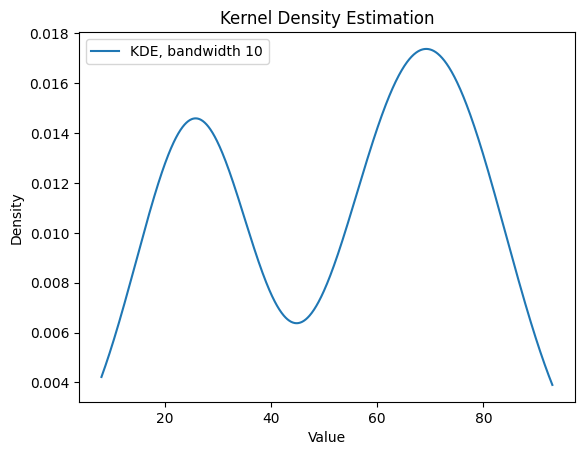

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

data = np.array([26, 30, 27, 18, 75, 66, 73, 63, 56, 83])

kde_10 = KernelDensity(kernel='gaussian', bandwidth=10)
kde_10.fit(data.reshape(-1, 1))

x = np.linspace(min(data) - 10, max(data) + 10, 1000)
log_dens_10 = kde_10.score_samples(x.reshape(-1, 1))
dens = np.exp(log_dens_10)

plt.plot(x, dens, label='KDE, bandwidth 10')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()


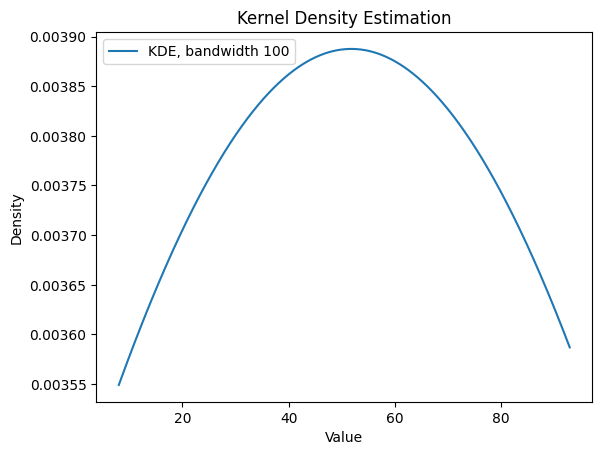

In [46]:
kde_100 = KernelDensity(kernel='gaussian',bandwidth=100)
kde_100.fit(data.reshape(-1, 1))

x = np.linspace(min(data) - 10, max(data) + 10, 1000)
log_dens_100 = kde_100.score_samples(x.reshape(-1, 1))
dens = np.exp(log_dens_100)

plt.plot(x, dens, label='KDE, bandwidth 100')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()

Question 3c

In [47]:
new_sample = (np.array([30]).reshape(-1,1))
log_prob_10 = kde_10.score_samples(new_sample)
log_prob_100 = kde_100.score_samples(new_sample)

prob_10 = np.exp(log_prob_10)
prob_100 = np.exp(log_prob_100)

print(f"Probability for bandwidth 10: {prob_10[0]}")
print(f"Probability for bandwidth 100: {prob_100[0]}")

Probability for bandwidth 10: 0.013587585673241163
Probability for bandwidth 100: 0.003800711478428754


In [48]:
new_sample = (np.array([95]).reshape(-1,1))
log_prob_10 = kde_10.score_samples(new_sample)
log_prob_100 = kde_100.score_samples(new_sample)

prob_10 = np.exp(log_prob_10)
prob_100 = np.exp(log_prob_100)

print(f"Probability for bandwidth 10: {prob_10[0]}")
print(f"Probability for bandwidth 100: {prob_100[0]}")

Probability for bandwidth 10: 0.0029218689075688766
Probability for bandwidth 100: 0.0035583911249301788


Question 3e


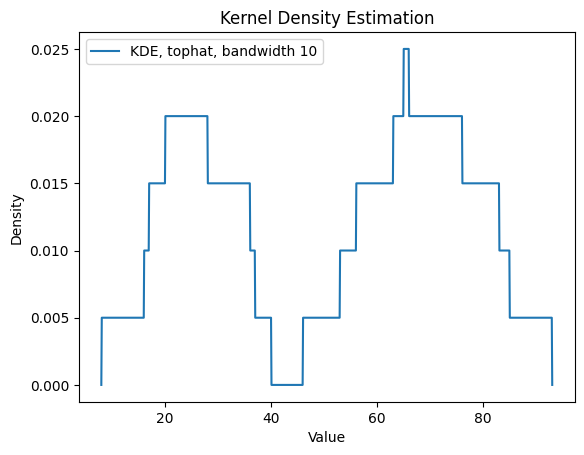

In [49]:
kde_tophat_10 = KernelDensity(kernel='tophat', bandwidth=10)
kde_tophat_10.fit(data.reshape(-1, 1))

x = np.linspace(min(data) - 10, max(data) + 10, 1000)
log_dens_tophat_10 = kde_tophat_10.score_samples(x.reshape(-1, 1))
dens = np.exp(log_dens_tophat_10)

plt.plot(x, dens, label='KDE, tophat, bandwidth 10')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()